#### 통계적 추정
- 점 추정
    - 모평균이나 모분산 등의 모수를 하나의 수치로 추정
    - 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
    - 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
    - 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해 가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치 추정량이라고 함.
    - 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 할 수 있다.
    - 모분산의 불편 추정량이 되는 표본통계량은 불편분산이다.
    - 불편분산은 표본분산에서 나누는 수 n-1로 하는 식으로 계산되며 표본분산은 $S^2$으로 나타내지만 불편분산은 $s^2$으로 나타낸다.

- 구간추정
    - 모분산을 알고 있는 경우의 모평균 구간추정
    - 모분산을 알고 있는 경우의 모분산 구간추정
    - 모분산을 알지 못하는 경우의 모평균 구간추정
    - 베르누이 분포의 모평균의 구간추정
    - 포아송 분포의 모평균의 구간추정

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
import scipy as sp
from scipy.special import factorial
from matplotlib import rc
rc('font',family='Malgun Gothic') # 한글 인코딩
plt.rcParams['axes.unicode_minus'] = False # 음수 부분 처리
plt.style.use('seaborn')

In [2]:
%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
p_mean = np.mean(scores)
p_var = np.var(scores)
p_mean, p_var

(69.53, 206.6691)

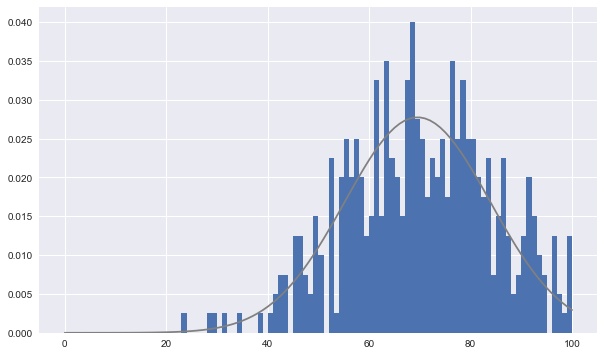

In [4]:
# 모집단이 정규분포를 어느 정도는 따르는지 확인
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0,100),density=True)

plt.show()

In [5]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores,n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [6]:
# 표본 크기가 20인 표본 데이터를 1만개 준비하겠다.
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

In [10]:
# [과제] 모평균과 모분산의 점추정 사례를 파이썬 코드로 수행하세요.

In [15]:
# 불편추정량 이용

sample_means = np.mean(samples, axis=1)
print(np.mean(sample_means), p_mean)

# 일치추정량 이용

print(np.mean(np.random.choice(scores,int(1e6))), p_mean)

# 결과는 모평균과 비슷하다.

69.53799999999998 69.53
69.527963 69.53


In [16]:
# 같은 방법으로 표본분산이 모분산의 좋은 추정량이 되는지 확인해보자.
# 불편분산이 불편추정량이 되기에 적합하다.

sample_vars = np.var(samples, axis=1, ddof=1)
print(np.mean(sample_vars), p_var)

# 일치추정량 이용

print(np.var(np.random.choice(scores, int(1e6)),ddof=1), p_var)

# 결과는 모분산과 비슷하다.

206.67808263157895 206.6691
206.3108875769986 206.6691


In [17]:
s_mean = np.mean(sample)

모분산을 알고 있는 경우
- 추정량은 추정량의 기댓값 그 자체인 모수와, 표준편차로 분산되어 있다.
- 추정량의 표준편차를 표준오차라고 한다.
- 모집단이 정규분포를 따른다면, 추정량은 정규분포를 따르고, Z스코어로 표준화 하여 표준정규분포로 변환 가능하다.  
$Z = $ $(\bar{X}-\mu) \over \sqrt{\sigma^2/n}$
- 표준정규분포에서 $100(1-\alpha)$ 구간을 계산할 수 있고, 이것이 신뢰구간이 된다.
- 모평균의 $\alpha$ 신뢰구간  
$[\bar{X}-z_{\alpha/2}\sqrt{\sigma^2/n},\bar{X}-z_{1-\alpha/2}\sqrt{\sigma^2/n}]$

In [18]:
# 95% 신뢰구간 구하기
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)
lcl,ucl

(64.09956018535247, 76.70043981464754)

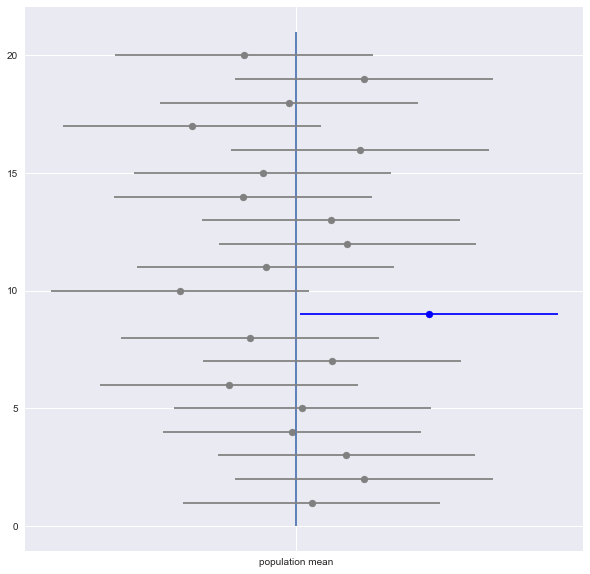

In [21]:
# 동일한 방법으로 수차례 표본추출하여 구간추정을 하면, 그중에 95%의 구간추정에는 모평균이 포함되어 있다.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean,0,21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i,color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i,color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [ ]:
# 모분산의 경우, 비슷한 과정을 통해 알 수 있는데, 책을 참고하기 바란다. (p.277)

In [22]:
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

In [ ]:
# [과제] 모분산을 알지 못할 때 정규분포의 모평균의 구간 추정을 파이썬 코드로 수행하세요.

모분산을 모르는 경우
- $\sqrt{\sigma^2/n}$ 대신 불편표준편차의 $\sqrt{s^2/n}$를 표준오차로 사용한다.
- 표준화 과정에서 다음의 식이 사용되는데, 이것은 t분포를 따른다. (카이제곱분포 Y 이용하여 구함)  
$t = $ $Z \over \sqrt{Y/(n-1)}$
- 이 때, $\alpha$ 신뢰구간은 다음과 같다.  
$[\bar{X}-t_{\alpha/2}(n-1)\sqrt{s^2/n}, \bar{X}-t_{1-\alpha/2}(n-1)\sqrt{s^2/n}]$

In [23]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)
lcl,ucl

(64.51244886603887, 76.28755113396114)

In [24]:
# 지금은 모집단이 정규분포를 따를 때의 예를 보았으나
# 베르누이분포, 포아송 분포를 따를 때에도 비슷한 방법으로 신뢰구간을 구할 수 있다.

In [1]:
# [과제] 모집단에 정규분포를 가정할 수 없는 예를 포아송 분포로 설정하여 모평균 신뢰구간을 구하세요

In [3]:
# 어떤 사이트에 대한 1시간당 액세스 수가 과거 72시간 분량이 들어 있는 데이터 ch10_access.csv를 사용한다.
# 이 사이트에 대한 1시간당 평균 액세스 수를 추정하자.
n_access_df = pd.read_csv('./data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [4]:
# 모평균
s_mean = n_access.mean()
s_mean

10.444444444444445

포아송 분포의 경우
- 포아송 분포의 표본평균이 따르는 확률분포는 알지 못함.
- 중심극한정리에 의해 표본평균 $\bar{X}$는 근사적으로 $N(\lambda,\lambda/n)$을 따른다.
- 표준화하면, Z는 표준정규분포를 따른다.  
$Z = $ $(\bar{X}-\lambda) \over \sqrt{\lambda/n}$
- 모평균의 신뢰수준 $100(1-\alpha)$ 신뢰구간  
$[\bar{X}-z_{\alpha/2}\sqrt{\bar{X}/n} \leq \lambda \leq \bar{X}-z_{1-\alpha/2}\sqrt{\bar{X}/n}]$

In [6]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)
lcl,ucl

(9.697953549598202, 11.190935339290688)

#### 통계적 가설검정

In [ ]:
# [과제] A학생의 사례로 가설검정의 프로세스를 정리하세요.

Process
- 가설을 세움: 감자튀김의 모평균은 130(귀무가설)
- 유의수준 결정: 5%, 임계값: 128.681
- 검정통계량 계산: 검정통계량으로 표본평균, 128.451
- 유의하므로(검정통계량 < 임계값), 귀무가설을 기각

In [7]:
# Q. '감자튀김 무게의 평균이 130g이다' 라는 귀무가설에 대한 유의성 검정을 수행하세요.(정규분포, 분산 9)
np.random.seed(1111)
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df['무게'])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [8]:
s_mean = np.mean(sample)
s_mean

128.4507142857143

In [12]:
z = (s_mean - 130) / np.sqrt(9/14)
rv = stats.norm()
z, rv.isf(0.95)

(-1.932298779026813, -1.6448536269514722)

In [13]:
# p값이 유의수준 0.05 보다 작으므로 귀무가설을 기각한다.
# '모평균은 130g이다' 라는 결론이 되는 것은 아니다.
p_value = rv.cdf(z)
p_value

0.026661319523126635